## Convolutional neural network

![CNN](CNN.svg)

In [16]:
from IPython.display import YouTubeVideo

def display_yotube_video(url, **kwargs):
    """
    Displays a Youtube video in a Jupyter notebook.
    
    Args:
        url (string): a link to a Youtube video.
        **kwargs: further arguments for IPython.display.YouTubeVideo
    
    Returns:
        YouTubeVideo: a video that is displayed in your notebook.
    """
    id_ = url.split("=")[-1]
    return YouTubeVideo(id_, **kwargs)

In [1]:
# Read links :
from IPython.display import IFrame

IFrame(src='https://ujjwalkarn.me/2016/08/11/intuitive-explanation-convnets/', width=1500, height=600)

In [30]:
# Read links :
from IPython.display import IFrame

IFrame(src='https://ujjwalkarn.me/2016/08/09/quick-intro-neural-networks/', width=1200, height=800)


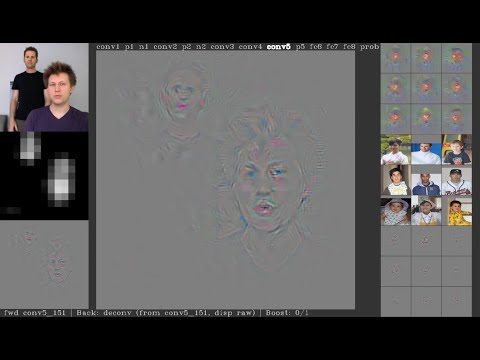

In [17]:
display_yotube_video("https://www.youtube.com/watch?v=AgkfIQ4IGaM", width=1200, height=800)

In [26]:
# Read links :
from IPython.display import IFrame

IFrame(src='https://in.mathworks.com/solutions/deep-learning/convolutional-neural-network.html', width=1500, height=600)

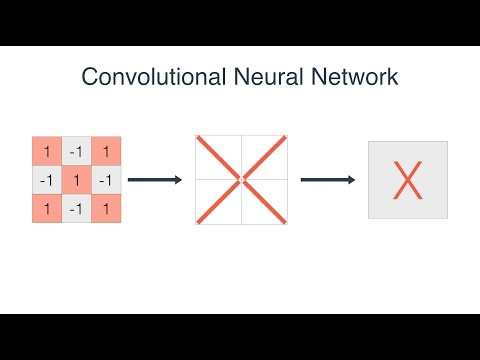

In [27]:
display_yotube_video("https://www.youtube.com/watch?v=2-Ol7ZB0MmU", width=1200, height=800)